In [7]:
import cv2 #type: ignore
import matplotlib.pyplot as plt #type: ignore
import numpy as np #type: ignore
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


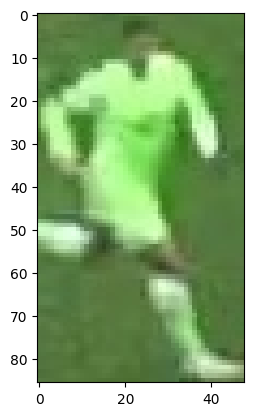

In [3]:
plt.imshow(image)
plt.show()

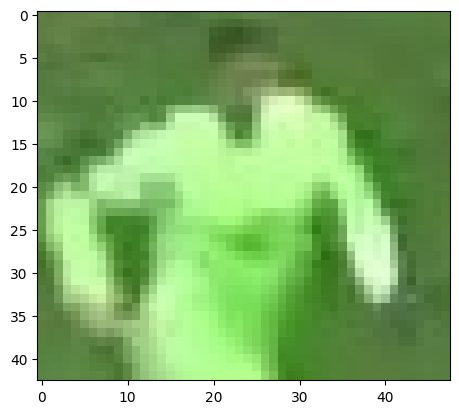

In [4]:
top_half_image= image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

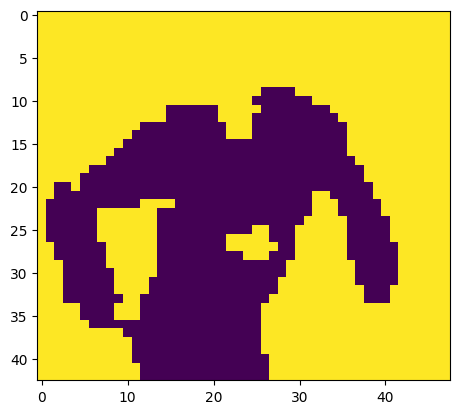

In [9]:
image_2d = top_half_image.reshape(-1, 3) 

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [10]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)  
print(non_player_cluster) 

1


In [11]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [12]:
kmeans.cluster_centers_[player_cluster]

array([171.11330698, 235.40316206, 142.52700922])